установка библиотек 

In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score,  classification_report


загружаем прошлую сессию 

In [3]:
data = pd.read_csv("C:\\Users\\kikot\\OneDrive\\Рабочий стол\\data.csv")

выводим таблицу

In [4]:
data

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
0,11,WSR/1.4-828/2019,08.04.2019,140-р 08.04.2019,Крайчинская С.Б.,"Ажгиревич А.И. (ОООР ""Союз Машиностроителей Ро...",Вх - Об участии в заочном заседании Совета по ...,"Повестка заседания, а также материалы к нему, ..."
1,22,WSR/1-817/2019,08.04.2019,б/н 05.04.2019,Уразов Р.Н.,Без автора (Управление Президента Российской Ф...,Вх - Об участии в заседании рабочей группы по ...,поступило с эл. адреса prm_Bilenkina@gov.ru в ...
2,26,WSR/1-813/2019,08.04.2019,ИП-398/05 05.04.2019,Уразов Р.Н.,Потехина И.П. (Министерство просвещения Россий...,Вх - О предоставлении документов для заключени...,"срок до 6 апреля, письмо прислали 5 апр в 19:4..."
3,114,WSR/1-724/2019,01.04.2019,Д10/4932-ис 07.03.2019,Уразов Р.Н.,Пашков К.А. (Министерство транспорта Российско...,Вх - Об участии в совещании по вопросу достиже...,письмо получено 01.04.2019 - (Почта России)
4,116,WSR/1-722/2019,01.04.2019,3365 25.03.2019,Глушко Д.Е.,"Томских А.А. (Министерство образования, науки ...",Вх - О направлении дорожной карты внедрения ре...,для передачи Уфимцеву/Дмитриеву
...,...,...,...,...,...,...,...,...
303,4936,WSR/1.-1775/2017,03.11.2017,107/10 27.10.2017,Уразов Р.Н.,"Климов Е.С. (ООО ""Эттон-Центр"")",Возражения на Отзыв Союза на Исковое завление,"Без приложений, т.к. письмо направлено в Арбит..."
304,4937,WSR/1.-1774/2017,07.11.2017,2040/01/2 17.10.2017,Уразов Р.Н.,Равич К. (Министерство промышленной политики Р...,О приглашении на IV Чемпионат WorldSkills Hi-T...,Направлено Мироновой С.
305,4952,WSR/1.-1761/2017,02.11.2017,03-15-1514/17-0-2 20.10.2017,Уразов Р.Н.,Соляников Ю.В. (Комитет по образованию Правите...,Об участии в мероприятиях IV Чемпионата WorldS...,Направлено Мироновой С.
306,4953,WSR/1.-1758/2017,02.11.2017,4598/01-021-17 01.11.2017,Уразов Р.Н.,Зубов Д.Ю. (Министерство образования и науки К...,Об участии в IV Национальном чемпионате сквозн...,Направлено Глушко Д.Е.


смотри наличие пустых значений 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   №п/п                   308 non-null    int64 
 1   №документа             308 non-null    object
 2   дата регистрации       308 non-null    object
 3   исходный номер и дата  308 non-null    object
 4   Адресат                308 non-null    object
 5   Автор                  308 non-null    object
 6   Краткое содежание      308 non-null    object
 7   Примечание             308 non-null    object
dtypes: int64(1), object(7)
memory usage: 19.4+ KB


видим что пустые значения отсутствуют 

In [6]:
data.columns # список столбцов нашего датасета 

Index(['№п/п', '№документа', 'дата регистрации', 'исходный номер и дата',
       'Адресат', 'Автор', 'Краткое содежание', 'Примечание'],
      dtype='object')

In [7]:
col=['№п/п', '№документа', 'дата регистрации', 'исходный номер и дата',
       'Адресат', 'Автор', 'Краткое содежание', 'Примечание']

In [8]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

data, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
data.head()

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
0,11,268,37,104,16,4,186,138
1,22,213,37,276,38,22,199,216
2,26,212,37,247,38,164,120,239
3,114,204,1,236,38,156,205,212
4,116,202,1,165,3,200,59,198


# random forest

In [9]:
X=data

In [10]:
# результат, подготовленные данные
X

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
0,11,268,37,104,16,4,186,138
1,22,213,37,276,38,22,199,216
2,26,212,37,247,38,164,120,239
3,114,204,1,236,38,156,205,212
4,116,202,1,165,3,200,59,198
...,...,...,...,...,...,...,...,...
303,4936,223,12,78,38,90,0,16
304,4937,222,34,132,38,168,253,73
305,4952,221,8,29,38,195,267,73
306,4953,220,8,183,38,76,265,72


присваиваем Y колонну Адресат 

In [11]:
Y=data['Адресат']

разделим набор на тренировочный и тестовый

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности

In [13]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

смотрим какой самый значимый признак 

In [14]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.409, 'Адресат'],
 [0.12, '№документа'],
 [0.1018, 'Краткое содежание'],
 [0.0919, '№п/п'],
 [0.0763, 'дата регистрации'],
 [0.0726, 'Примечание'],
 [0.0649, 'исходный номер и дата'],
 [0.0636, 'Автор']]

выводим талицу 

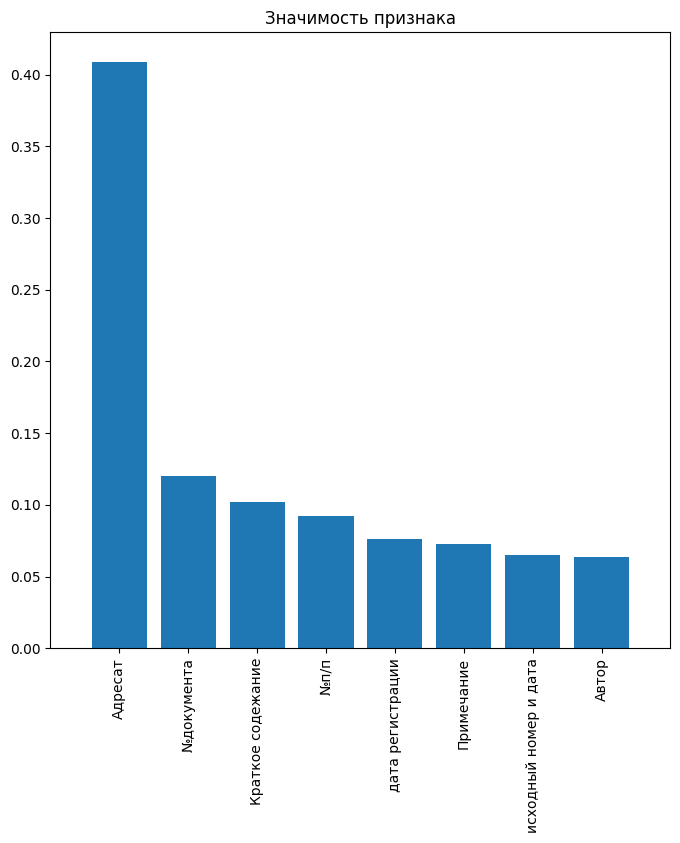

In [15]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

видим что адресат самый значимый признак  

обучение модели Random Forest

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

присваиваем переменным x  и y значение 

In [17]:
X = data.drop('Адресат', axis=1)
y = data['Адресат']

In [18]:
model = make_pipeline(StandardScaler(), SVC())

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [20]:
y_pred = model.predict(X_test)

оченка производительности/эффективности модели 

In [21]:
# метрика r2
r2_score(model.predict(X_test), y_test)


0.9638638458251167

выводим точность модели 

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.7580645161290323


точность модели 0.7

# SVM

присваиваем переменным x  и y значение 

In [23]:
X = data.drop('Адресат', axis=1)
y = data['Адресат']

разделяем данные на обучающую и тестовую выборки  

test_size=0.2 задает размер тестовой выборки в 20% от исходных данных.

random_state=42 задает начальное значение для генератора случайных чисел, чтобы результаты можно было воспроизвести.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = make_pipeline(StandardScaler(), SVC())

обучает на данных X_train с y_train.

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

присваиваю y_pred значение model.predict(X_test)

In [27]:
y_pred = model.predict(X_test)

выводим точность модели 

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')


Точность модели: 0.5161290322580645


точность модели 0.5

# KNN

In [29]:
X = data.drop('Адресат', axis=1)
y = data['Адресат']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(246, 7) (62, 7) (246,) (62,)


In [31]:
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [32]:
scores

{1: 0.5,
 2: 0.4032258064516129,
 3: 0.41935483870967744,
 4: 0.41935483870967744,
 5: 0.45161290322580644,
 6: 0.45161290322580644,
 7: 0.43548387096774194,
 8: 0.3870967741935484,
 9: 0.4032258064516129,
 10: 0.41935483870967744,
 11: 0.4032258064516129,
 12: 0.4032258064516129,
 13: 0.43548387096774194,
 14: 0.5,
 15: 0.45161290322580644,
 16: 0.45161290322580644,
 17: 0.43548387096774194,
 18: 0.43548387096774194,
 19: 0.45161290322580644,
 20: 0.45161290322580644,
 21: 0.46774193548387094,
 22: 0.5161290322580645,
 23: 0.5,
 24: 0.5483870967741935,
 25: 0.5161290322580645}

Text(0, 0.5, 'Accuracy')

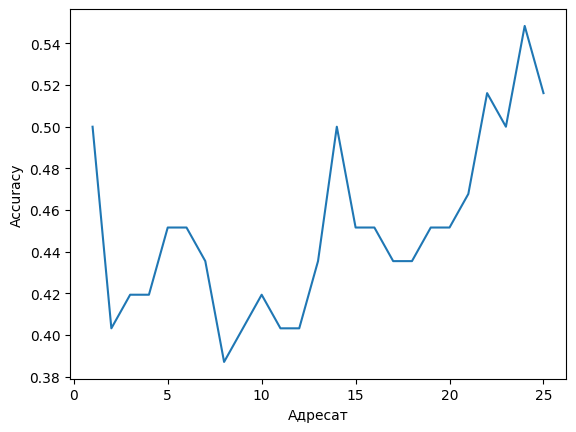

In [33]:
plt.plot(k_range, scores_list)
plt.xlabel('Адресат')
plt.ylabel('Accuracy')

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [35]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}

In [36]:
x_new = [[3,4,5,2],
         [5,4,2,2]]

In [37]:
y_predict = knn.predict

TypeError: 'method' object is not subscriptable

# Выводы 

В этой сессии мы выбирали модель класификации , такие как - Random Forest , Support Vector Machine (SVM) , KNN

Random Forest (Случайный лес)- Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

Support Vector Machine (SVM)- SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Метод k-ближайших соседей (KNN) — метрический алгоритм для автоматической классификации объектов или регрессии. В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны.

В визуализации Random Forest данных мы увидили , что адресат самый значимый признак 

Обоснование способа разделения на обучающую и тестирующую выборки
1) Оптимальное использование данных: разделение выборки позволяет эффективно использовать имеющиеся данные, поскольку обучающая выборка используется для обучения модели, а тестовая - для оценки ее производительности.
2) Предотвращение переобучения: если использовать одни и те же данные для обучения и тестирования модели, есть риск переобучения. Разделение выборки позволяет избежать этой проблемы.